In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium

### 1. 데이터 호출 및 전처리

In [2]:
train_data = pd.read_csv('./train.csv.zip')

#### 결측치 확인

In [3]:
train_data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

#### 칼럼 확인

In [4]:
train_data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

#### 데이터 개수 및 칼럼 개수 확인

In [5]:
train_data.shape

(878049, 9)

In [6]:
train_data.duplicated().sum()

2323

In [7]:
train_data.drop_duplicates(inplace=True)
train_data.reset_index(inplace=True, drop=True)


### Criminal과 Non-Criminal 구분

In [8]:
train_data['Category'].value_counts()

LARCENY/THEFT                  174320
OTHER OFFENSES                 125960
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUNAWAY     

In [9]:
train_criminal = train_data[train_data['Category'] != 'NON-CRIMINAL']
train_non_criminal = train_data[train_data['Category'] == 'NON-CRIMINAL']

### 범죄 발생 위치 시각화

In [10]:
train_places = train_criminal.copy()

In [11]:
sf_lat = 37.77
sf_lon = -122.42

m = folium.Map(location=[sf_lat, sf_lon], 
                         zoom_start=11)

In [12]:
for i in train_places.index[:2000]: # 데이터 양이 많아 2000개만 표시
    folium.Marker(
        location = train_places.loc[i, ['Y', 'X']].to_list(),
        tooltip = train_places.loc[i, 'Category'],
        icon = folium.Icon(color='blue',icon='star')
        ).add_to(m)
m

### 2. train_datetime

In [13]:
train_dateframe = train_criminal.copy()

#### Dates 칼럼을 datetime 객체로 변환

In [14]:
train_dateframe['Dates'] = pd.to_datetime(train_dateframe['Dates'])

In [15]:
train_dateframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783811 entries, 0 to 875725
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       783811 non-null  datetime64[ns]
 1   Category    783811 non-null  object        
 2   Descript    783811 non-null  object        
 3   DayOfWeek   783811 non-null  object        
 4   PdDistrict  783811 non-null  object        
 5   Resolution  783811 non-null  object        
 6   Address     783811 non-null  object        
 7   X           783811 non-null  float64       
 8   Y           783811 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 75.9+ MB


#### Dates 칼럼을 Year, Month, Day, Hour 칼럼으로 나눈다.

In [16]:
train_dateframe['Year'] = train_dateframe['Dates'].dt.year
train_dateframe['Month'] = train_dateframe['Dates'].dt.month
train_dateframe['Day'] = train_dateframe['Dates'].dt.day
train_dateframe['Hour'] = train_dateframe['Dates'].dt.hour
train_dateframe['Minute'] = train_dateframe['Dates'].dt.minute
train_dateframe['Second'] = train_dateframe['Dates'].dt.second

In [17]:
train_dateframe.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year  Month  Day  Hour  Minute  Second  
0 -122.425892  37.774599  2015      5   13    23      53       0  
1 -122.425892  37.774599  2015      5   13    23      53       0  
2 -122.424363  37.800414  2015      5   13    23      33       0  
3 -122.426995  37.800873  2015      5   13    23      30       0  
4 -122.438738  37.771541  2015      5   13    23      30       0

#### 날짜를 기준으로 오름차순 정렬한다.

In [18]:
train_dateframe = train_dateframe.sort_values(by='Dates')
train_dateframe

Dates                Category  \
875725 2003-01-06 00:01:00  FORGERY/COUNTERFEITING   
875722 2003-01-06 00:01:00           LARCENY/THEFT   
875724 2003-01-06 00:01:00               VANDALISM   
875723 2003-01-06 00:01:00           LARCENY/THEFT   
875721 2003-01-06 00:15:00                 ROBBERY   
...                    ...                     ...   
4      2015-05-13 23:30:00           LARCENY/THEFT   
3      2015-05-13 23:30:00           LARCENY/THEFT   
2      2015-05-13 23:33:00          OTHER OFFENSES   
1      2015-05-13 23:53:00          OTHER OFFENSES   
0      2015-05-13 23:53:00                WARRANTS   

                                         Descript  DayOfWeek PdDistrict  \
875725                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   
875722               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
875724  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
875723               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
875721           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
...                                           ...        ...        ...   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
0                                  WARRANT ARREST  Wednesday   NORTHERN   

            Resolution                     Address           X          Y  \
875725            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212   
875722            NONE        600 Block of EDNA ST -122.447364  37.731948   
875724            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607   
875723            NONE          5TH ST / FOLSOM ST -122.403390  37.780266   
875721            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056   
...                ...                         ...         ...        ...   
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541   
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873   
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414   
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   

        Year  Month  Day  Hour  Minute  Second  
875725  2003      1    6     0       1       0  
875722  2003      1    6     0       1       0  
875724  2003      1    6     0       1       0  
875723  2003      1    6     0       1       0  
875721  2003      1    6     0      15       0  
...      ...    ...  ...   ...     ...     ...  
4       2015      5   13    23      30       0  
3       2015      5   13    23      30       0  
2       2015      5   13    23      33       0  
1       2015      5   13    23      53       0  
0       2015      5   13    23      53       0  

[783811 rows x 15 columns]

#### 낮, 밤을 구분하는 칼럼을 추가한다. // train_dates 변수

In [19]:
# 일출, 일몰 데이터 가져오기
# https://sunrise.maplogs.com/san_francisco_county_ca_usa.727.html?year=2003 에서 크롤링

day_night = pd.read_csv('day_night.csv')
day_night.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Dates    4380 non-null   object
 1   Sunrise  4380 non-null   int64 
 2   Sunset   4380 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 102.8+ KB


In [20]:
day_night['Dates'] = pd.to_datetime(day_night['Dates'])

day_night['Dates'] = pd.DatetimeIndex(day_night['Dates']).date
day_night.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Dates    4380 non-null   object
 1   Sunrise  4380 non-null   int64 
 2   Sunset   4380 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 102.8+ KB


In [21]:
# train_datetime['Dates']와 day_night['Dates']의 값 형식이 다름

train_dateframe['Dates'] = pd.DatetimeIndex(train_dateframe['Dates']).date
train_dateframe.head()

Dates                Category  \
875725  2003-01-06  FORGERY/COUNTERFEITING   
875722  2003-01-06           LARCENY/THEFT   
875724  2003-01-06               VANDALISM   
875723  2003-01-06           LARCENY/THEFT   
875721  2003-01-06                 ROBBERY   

                                         Descript DayOfWeek PdDistrict  \
875725                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW   
875722               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE   
875724  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN   
875723               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN   
875721           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL   

       Resolution                     Address           X          Y  Year  \
875725       NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  2003   
875722       NONE        600 Block of EDNA ST -122.447364  37.731948  2003   
875724       NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  2003   
875723       NONE          5TH ST / FOLSOM ST -122.403390  37.780266  2003   
875721       NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  2003   

        Month  Day  Hour  Minute  Second  
875725      1    6     0       1       0  
875722      1    6     0       1       0  
875724      1    6     0       1       0  
875723      1    6     0       1       0  
875721      1    6     0      15       0

In [22]:
train_dates = pd.merge(train_dateframe, day_night, how='left')
train_dates.head()

Dates                Category  \
0  2003-01-06  FORGERY/COUNTERFEITING   
1  2003-01-06           LARCENY/THEFT   
2  2003-01-06               VANDALISM   
3  2003-01-06           LARCENY/THEFT   
4  2003-01-06                 ROBBERY   

                                    Descript DayOfWeek PdDistrict Resolution  \
0                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW       NONE   
1               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE       NONE   
2  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN       NONE   
3               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN       NONE   
4           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL       NONE   

                      Address           X          Y  Year  Month  Day  Hour  \
0    1800 Block of NEWCOMB AV -122.394926  37.738212  2003      1    6     0   
1        600 Block of EDNA ST -122.447364  37.731948  2003      1    6     0   
2        TOWNSEND ST / 2ND ST -122.390531  37.780607  2003      1    6     0   
3          5TH ST / FOLSOM ST -122.403390  37.780266  2003      1    6     0   
4  FARALLONES ST / CAPITOL AV -122.459033  37.714056  2003      1    6     0   

   Minute  Second  Sunrise  Sunset  
0       1       0      7.0    17.0  
1       1       0      7.0    17.0  
2       1       0      7.0    17.0  
3       1       0      7.0    17.0  
4      15       0      7.0    17.0

#### 더 이상 필요없는 Dates 칼럼을 제거한다.

In [23]:
train_dates.drop('Dates', axis=1, inplace=True)

In [24]:
train_dates.head()

Category                                   Descript  \
0  FORGERY/COUNTERFEITING                   CHECKS, FORGERY (FELONY)   
1           LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
2               VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
3           LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
4                 ROBBERY           ROBBERY ON THE STREET WITH A GUN   

  DayOfWeek PdDistrict Resolution                     Address           X  \
0    Monday    BAYVIEW       NONE    1800 Block of NEWCOMB AV -122.394926   
1    Monday  INGLESIDE       NONE        600 Block of EDNA ST -122.447364   
2    Monday   SOUTHERN       NONE        TOWNSEND ST / 2ND ST -122.390531   
3    Monday   SOUTHERN       NONE          5TH ST / FOLSOM ST -122.403390   
4    Monday    TARAVAL       NONE  FARALLONES ST / CAPITOL AV -122.459033   

           Y  Year  Month  Day  Hour  Minute  Second  Sunrise  Sunset  
0  37.738212  2003      1    6     0       1       0      7.0    17.0  
1  37.731948  2003      1    6     0       1       0      7.0    17.0  
2  37.780607  2003      1    6     0       1       0      7.0    17.0  
3  37.780266  2003      1    6     0       1       0      7.0    17.0  
4  37.714056  2003      1    6     0      15       0      7.0    17.0

In [25]:
train_dates.shape

(783811, 16)

#### 2015년 데이터는 5월까지만 존재하므로 제거한다.

In [26]:
train_dates = train_dates[train_dates['Year'] != 2015]

#### 낮과 밤을 구분하는 column 추가한다.

In [27]:
train_dates = train_dates[['Year', 'Month', 'Hour', 'DayOfWeek', 'Category', 'Sunrise', 'Sunset']]
train_dates

Year  Month  Hour DayOfWeek                Category  Sunrise  Sunset
0       2003      1     0    Monday  FORGERY/COUNTERFEITING      7.0    17.0
1       2003      1     0    Monday           LARCENY/THEFT      7.0    17.0
2       2003      1     0    Monday               VANDALISM      7.0    17.0
3       2003      1     0    Monday           LARCENY/THEFT      7.0    17.0
4       2003      1     0    Monday                 ROBBERY      7.0    17.0
...      ...    ...   ...       ...                     ...      ...     ...
759688  2014     12    23    Sunday           VEHICLE THEFT      7.0    16.0
759689  2014     12    23    Sunday                 ASSAULT      7.0    16.0
759690  2014     12    23    Sunday                WARRANTS      7.0    16.0
759691  2014     12    23    Sunday                 ASSAULT      7.0    16.0
759692  2014     12    23    Sunday                 ASSAULT      7.0    16.0

[759693 rows x 7 columns]

In [28]:
# 일출, 일몰 시간을 기준으로 낮과 밤 구분

train_dates.loc[(train_dates['Hour'] < train_dates['Sunrise']) | (train_dates['Hour'] >= train_dates['Sunset']), 'Day'] = 'Night'
train_dates.loc[(train_dates['Hour'] >= train_dates['Sunrise']) & (train_dates['Hour'] < train_dates['Sunset']), 'Day'] = 'Day'
train_dates

Year  Month  Hour DayOfWeek                Category  Sunrise  Sunset  \
0       2003      1     0    Monday  FORGERY/COUNTERFEITING      7.0    17.0   
1       2003      1     0    Monday           LARCENY/THEFT      7.0    17.0   
2       2003      1     0    Monday               VANDALISM      7.0    17.0   
3       2003      1     0    Monday           LARCENY/THEFT      7.0    17.0   
4       2003      1     0    Monday                 ROBBERY      7.0    17.0   
...      ...    ...   ...       ...                     ...      ...     ...   
759688  2014     12    23    Sunday           VEHICLE THEFT      7.0    16.0   
759689  2014     12    23    Sunday                 ASSAULT      7.0    16.0   
759690  2014     12    23    Sunday                WARRANTS      7.0    16.0   
759691  2014     12    23    Sunday                 ASSAULT      7.0    16.0   
759692  2014     12    23    Sunday                 ASSAULT      7.0    16.0   

          Day  
0       Night  
1       Night  
2       Night  
3       Night  
4       Night  
...       ...  
759688  Night  
759689  Night  
759690  Night  
759691  Night  
759692  Night  

[759693 rows x 8 columns]

## 데이터분석

### 전체 기간동안 카테고리 별 범죄 발생 건수

In [29]:
crime_per_cat = train_dateframe.groupby('Category').count()

In [30]:
crime_per_cat.reset_index(inplace=True)

In [31]:
crime_per_cat = crime_per_cat.sort_values(by='Descript', ascending=False)

Text(0.5, 1.0, 'The number of crime')

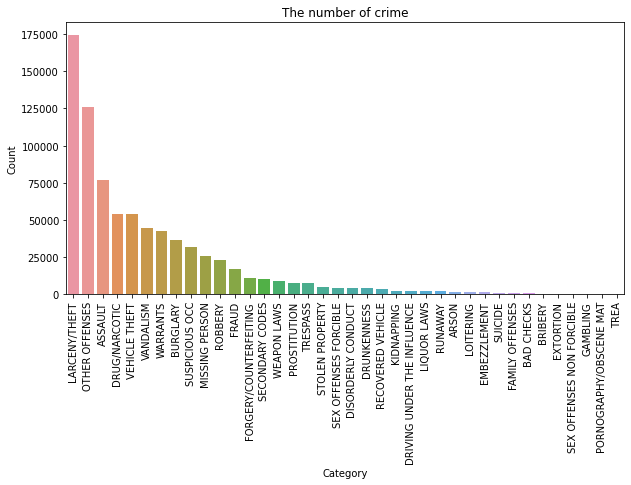

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=crime_per_cat['Category'], y=crime_per_cat['Descript'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('The number of crime')

### 연도별로 많이 발생하는 범죄 건수

In [33]:
crime_per_year = train_dateframe.groupby(['Year', 'Category']).count()

In [34]:
crime_per_year

Dates  Descript  DayOfWeek  PdDistrict  Resolution  \
Year Category                                                            
2003 ARSON            154       154        154         154         154   
     ASSAULT         6553      6553       6553        6553        6553   
     BAD CHECKS        69        69         69          69          69   
     BRIBERY           12        12         12          12          12   
     BURGLARY        2999      2999       2999        2999        2999   
...                   ...       ...        ...         ...         ...   
2015 TRESPASS         213       213        213         213         213   
     VANDALISM       1298      1298       1298        1298        1298   
     VEHICLE THEFT   1406      1406       1406        1406        1406   
     WARRANTS        1189      1189       1189        1189        1189   
     WEAPON LAWS      314       314        314         314         314   

                    Address     X     Y  Month   Day  Hour  Minute  Second  
Year Category                                                               
2003 ARSON              154   154   154    154   154   154     154     154  
     ASSAULT           6553  6553  6553   6553  6553  6553    6553    6553  
     BAD CHECKS          69    69    69     69    69    69      69      69  
     BRIBERY             12    12    12     12    12    12      12      12  
     BURGLARY          2999  2999  2999   2999  2999  2999    2999    2999  
...                     ...   ...   ...    ...   ...   ...     ...     ...  
2015 TRESPASS           213   213   213    213   213   213     213     213  
     VANDALISM         1298  1298  1298   1298  1298  1298    1298    1298  
     VEHICLE THEFT     1406  1406  1406   1406  1406  1406    1406    1406  
     WARRANTS          1189  1189  1189   1189  1189  1189    1189    1189  
     WEAPON LAWS        314   314   314    314   314   314     314     314  

[478 rows x 13 columns]

In [35]:
crime_per_year.reset_index(inplace=True)

In [36]:
crime_per_year.head()

Year    Category  Dates  Descript  DayOfWeek  PdDistrict  Resolution  \
0  2003       ARSON    154       154        154         154         154   
1  2003     ASSAULT   6553      6553       6553        6553        6553   
2  2003  BAD CHECKS     69        69         69          69          69   
3  2003     BRIBERY     12        12         12          12          12   
4  2003    BURGLARY   2999      2999       2999        2999        2999   

   Address     X     Y  Month   Day  Hour  Minute  Second  
0      154   154   154    154   154   154     154     154  
1     6553  6553  6553   6553  6553  6553    6553    6553  
2       69    69    69     69    69    69      69      69  
3       12    12    12     12    12    12      12      12  
4     2999  2999  2999   2999  2999  2999    2999    2999

In [37]:
crime_per_year.sort_values(by='Descript', ascending=False, inplace=True)

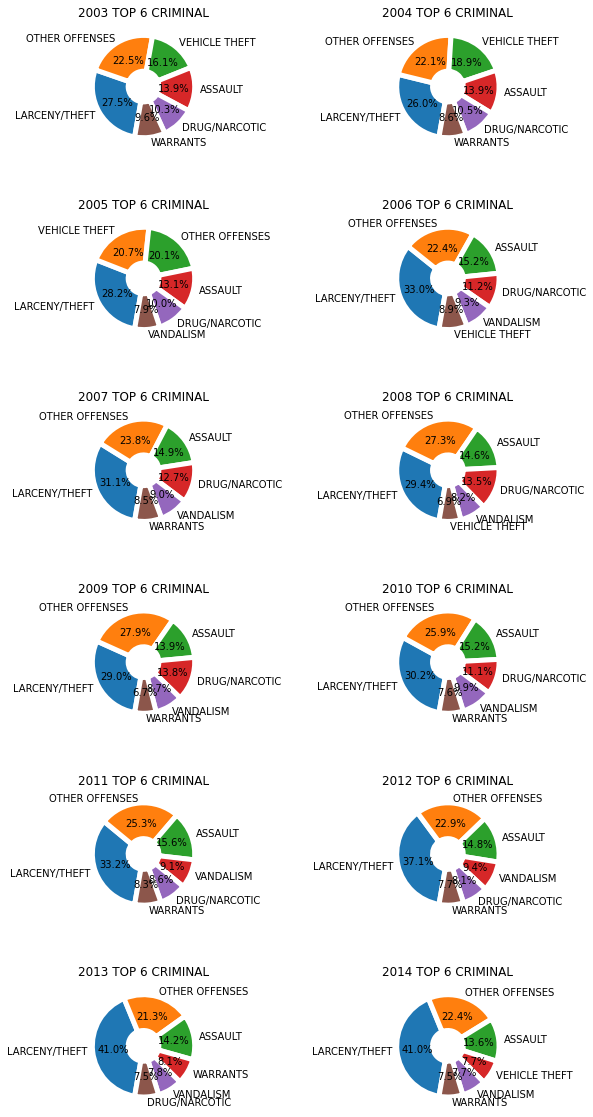

In [38]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
plt.subplots_adjust(hspace=0.5)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

for idx,i in enumerate(range(2003, 2015)):
    tmp = crime_per_year[crime_per_year['Year'] == i]
    tmp.reset_index(inplace=True, drop=True)
    ax[idx//2][idx%2].pie(tmp.loc[:5,'Descript'], labels=tmp.loc[:5,'Category'], autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    ax[idx//2][idx%2].set_title('{} TOP 6 CRIMINAL'.format(i))

plt.show()

In [39]:
crime_per_year = train_dateframe

In [40]:
tmp = pd.concat([crime_per_year, pd.get_dummies(crime_per_year['Category'])], axis=1).drop('Category', axis=1).groupby('Year').sum()

In [41]:
tmp.reset_index(inplace=True)

### 연도 별 범죄 발생 증가 추이

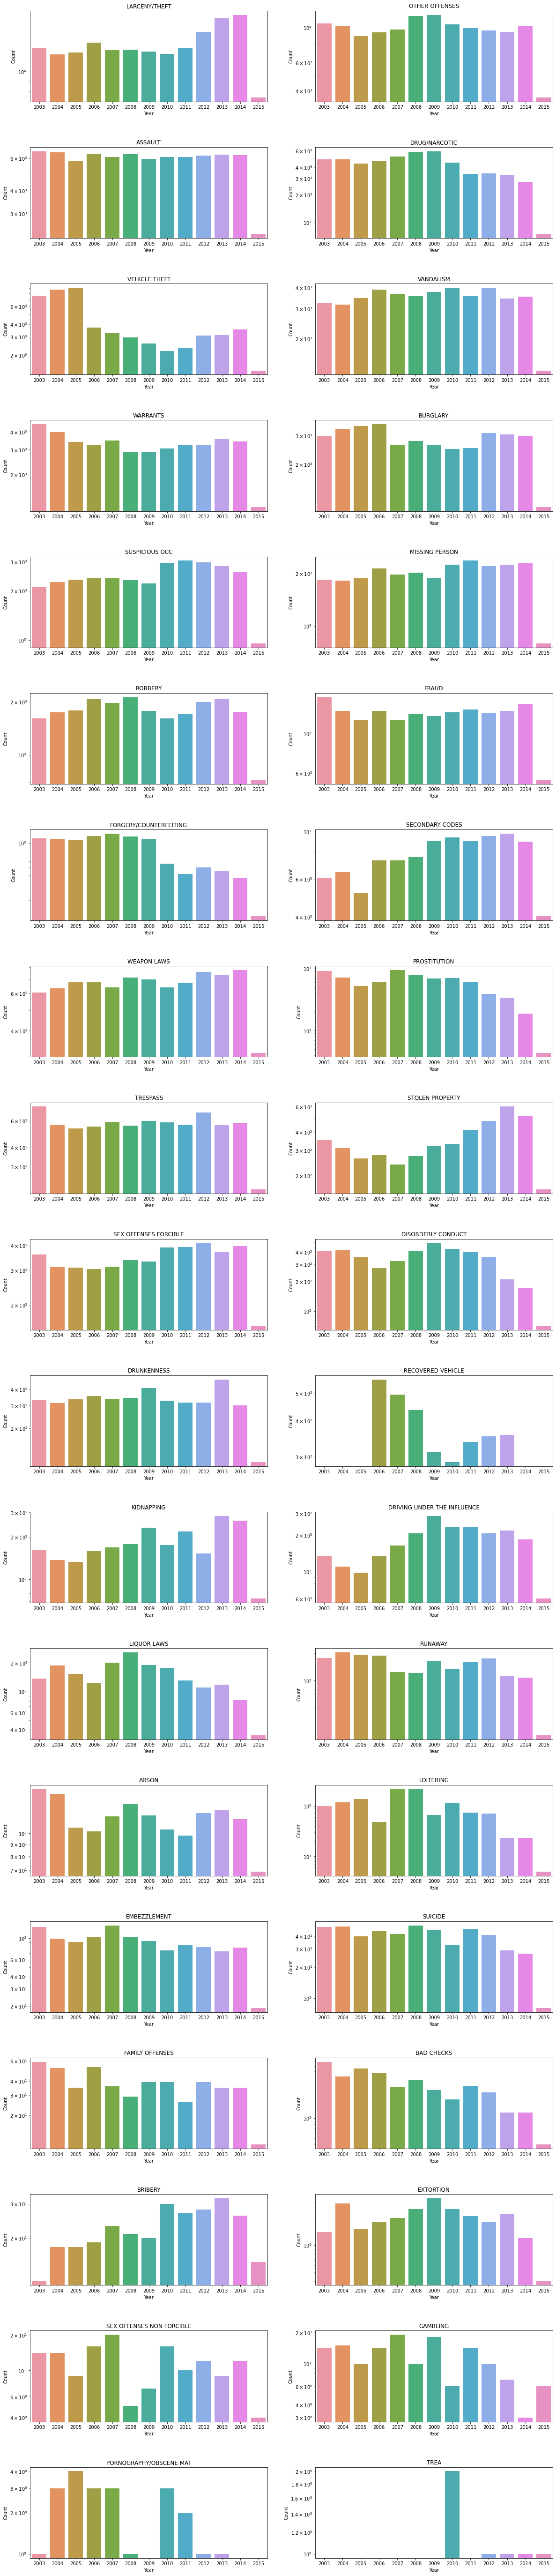

In [42]:
# plt.figure(figsize=(20, 40))
fig, axs = plt.subplots(nrows= len(list(crime_per_year['Category'].value_counts().index)) // 2, ncols=2, figsize=(20, 100))
plt.subplots_adjust(hspace=0.5)

for idx, i in enumerate(list(crime_per_year['Category'].value_counts().index)):
    sns.barplot(x=tmp['Year'], y=tmp[i], ax=axs[idx // 2][idx % 2])
    axs[idx // 2][idx % 2].set_title(i)
    axs[idx // 2][idx % 2].set_ylabel('Count')
    axs[idx // 2][idx % 2].set_yscale('log')

### 월별 범죄건수

In [43]:
crime_per_month = train_dateframe.groupby(['Category', 'Month']).count()

In [44]:
crime_per_month.reset_index(inplace=True)

In [45]:
crime_per_month.sort_values(by='Descript', ascending=False, inplace=True)

In [46]:
month='january february march april may june july august september october november december'

In [47]:
def cap_(x):
    return x.capitalize()

In [48]:
month = list(map(cap_ ,month.split(' ')))

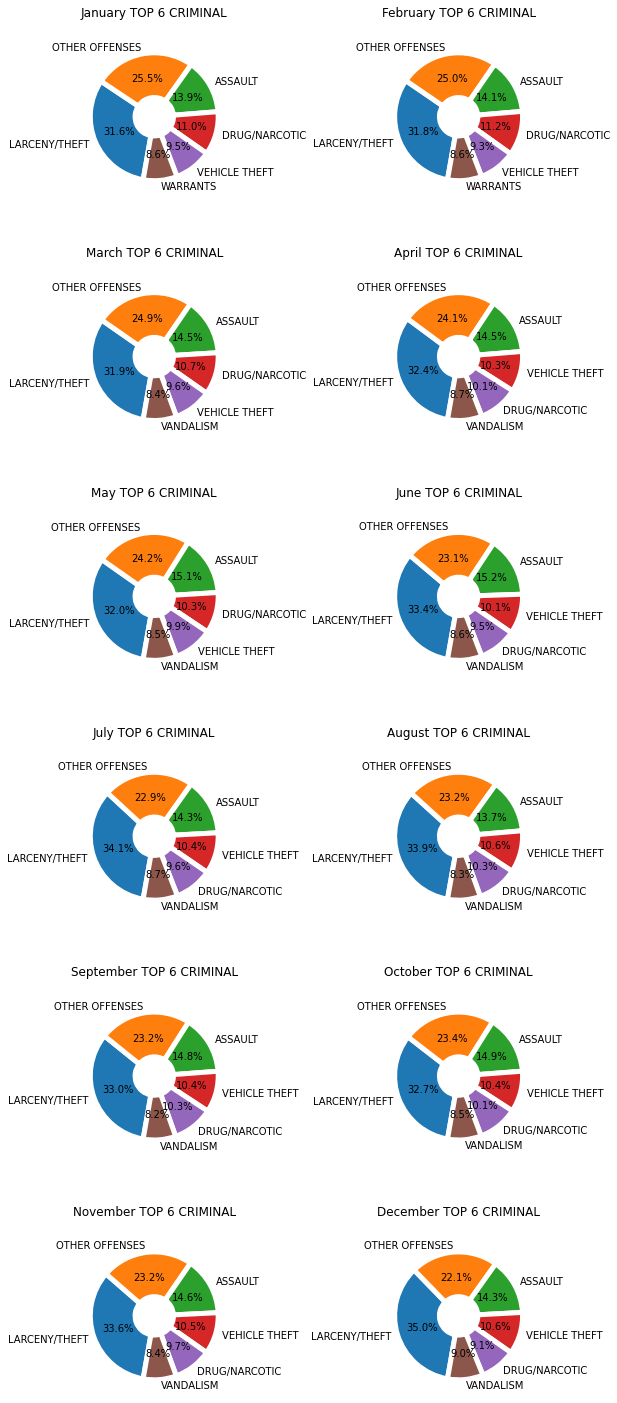

In [49]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,25))
plt.subplots_adjust(hspace=0.5)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

for idx, (i, mon_) in enumerate(zip(range(1,13), month)):
    tmp = crime_per_month[crime_per_month['Month'] == i]
    tmp.reset_index(inplace=True, drop=True)
    ax[idx//2][idx%2].pie(tmp.loc[:5,'Descript'], labels=tmp.loc[:5,'Category'], autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    ax[idx//2][idx%2].set_title('{} TOP 6 CRIMINAL'.format(mon_), pad=20)

plt.show()

In [50]:
crime_per_month = train_dateframe

In [51]:
tmp = pd.concat([crime_per_month, pd.get_dummies(crime_per_month['Category'])], axis=1).drop('Category', axis=1).groupby('Month').sum()

In [52]:
tmp.reset_index(inplace=True)

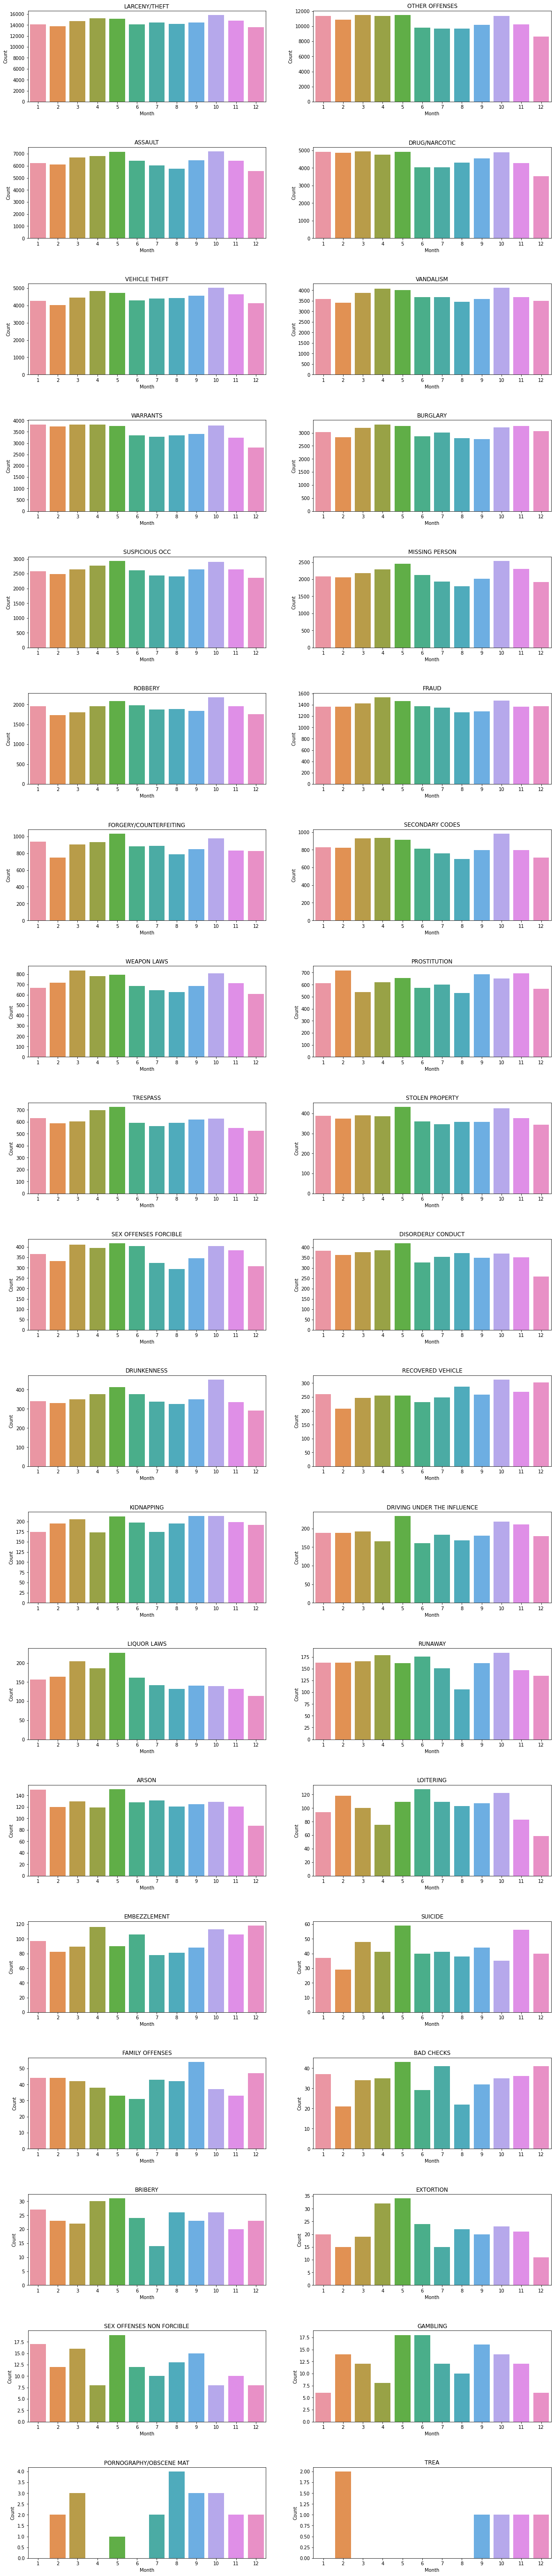

In [53]:
fig, axs = plt.subplots(nrows= len(list(crime_per_month['Category'].value_counts().index)) // 2, ncols=2, figsize=(20, 100))
plt.subplots_adjust(hspace=0.5)

for idx, i in enumerate(list(crime_per_month['Category'].value_counts().index)):
    sns.barplot(x=tmp['Month'], y=tmp[i], ax=axs[idx // 2][idx % 2])
    axs[idx // 2][idx % 2].set_title(i)
    axs[idx // 2][idx % 2].set_ylabel('Count')

### 계절에 따른 범죄 유형 별 범죄 발생 건수

In [54]:
train_dates.loc[train_dates['Month']==3, 'season'] = 'spring'
train_dates.loc[train_dates['Month']==4, 'season'] = 'spring'
train_dates.loc[train_dates['Month']==5, 'season'] = 'spring'
train_dates.loc[(6 <= train_dates['Month']) & (train_dates['Month'] <= 8), 'season'] = 'summer'
train_dates.loc[(9 <= train_dates['Month']) & (train_dates['Month'] <= 11), 'season'] = 'fall'
train_dates.loc[(12 <= train_dates['Month']) | (train_dates['Month'] <= 2), 'season'] = 'winter'
train_dates.head()

Year  Month  Hour DayOfWeek                Category  Sunrise  Sunset  \
0  2003      1     0    Monday  FORGERY/COUNTERFEITING      7.0    17.0   
1  2003      1     0    Monday           LARCENY/THEFT      7.0    17.0   
2  2003      1     0    Monday               VANDALISM      7.0    17.0   
3  2003      1     0    Monday           LARCENY/THEFT      7.0    17.0   
4  2003      1     0    Monday                 ROBBERY      7.0    17.0   

     Day  season  
0  Night  winter  
1  Night  winter  
2  Night  winter  
3  Night  winter  
4  Night  winter

### 주중, 주말에 따른 범죄건수

In [55]:
train_weekend = train_dateframe.copy()

In [56]:
train_weekend.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Second'],
      dtype='object')

In [57]:
train_weekend['DayOfWeek'].value_counts()

Friday       119445
Wednesday    115960
Saturday     112529
Thursday     111984
Tuesday      111924
Monday       108484
Sunday       103485
Name: DayOfWeek, dtype: int64

In [58]:
def week_or_not(x):
    if x == 'Sunday' or x == 'Saturday':
        return 'Weekend'
    else:
        return 'Weekday'

In [59]:
train_weekend['Weekend'] = train_weekend['DayOfWeek'].apply(lambda x : week_or_not(x))

In [60]:
train_weekend.head()

Dates                Category  \
875725  2003-01-06  FORGERY/COUNTERFEITING   
875722  2003-01-06           LARCENY/THEFT   
875724  2003-01-06               VANDALISM   
875723  2003-01-06           LARCENY/THEFT   
875721  2003-01-06                 ROBBERY   

                                         Descript DayOfWeek PdDistrict  \
875725                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW   
875722               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE   
875724  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN   
875723               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN   
875721           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL   

       Resolution                     Address           X          Y  Year  \
875725       NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  2003   
875722       NONE        600 Block of EDNA ST -122.447364  37.731948  2003   
875724       NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  2003   
875723       NONE          5TH ST / FOLSOM ST -122.403390  37.780266  2003   
875721       NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  2003   

        Month  Day  Hour  Minute  Second  Weekend  
875725      1    6     0       1       0  Weekday  
875722      1    6     0       1       0  Weekday  
875724      1    6     0       1       0  Weekday  
875723      1    6     0       1       0  Weekday  
875721      1    6     0      15       0  Weekday

In [61]:
train_weekend['Weekend'].value_counts()

Weekday    567797
Weekend    216014
Name: Weekend, dtype: int64

In [62]:
train_weekend.groupby(['Weekend', 'Category']).count()

Dates  Descript  DayOfWeek  PdDistrict  Resolution  \
Weekend Category                                                            
Weekday ARSON           1082      1082       1082        1082        1082   
        ASSAULT        52758     52758      52758       52758       52758   
        BAD CHECKS       341       341        341         341         341   
        BRIBERY          206       206        206         206         206   
        BURGLARY       27663     27663      27663       27663       27663   
...                      ...       ...        ...         ...         ...   
Weekend TRESPASS        1897      1897       1897        1897        1897   
        VANDALISM      13878     13878      13878       13878       13878   
        VEHICLE THEFT  15604     15604      15604       15604       15604   
        WARRANTS       10634     10634      10634       10634       10634   
        WEAPON LAWS     2358      2358       2358        2358        2358   

                       Address      X      Y   Year  Month    Day   Hour  \
Weekend Category                                                           
Weekday ARSON             1082   1082   1082   1082   1082   1082   1082   
        ASSAULT          52758  52758  52758  52758  52758  52758  52758   
        BAD CHECKS         341    341    341    341    341    341    341   
        BRIBERY            206    206    206    206    206    206    206   
        BURGLARY         27663  27663  27663  27663  27663  27663  27663   
...                        ...    ...    ...    ...    ...    ...    ...   
Weekend TRESPASS          1897   1897   1897   1897   1897   1897   1897   
        VANDALISM        13878  13878  13878  13878  13878  13878  13878   
        VEHICLE THEFT    15604  15604  15604  15604  15604  15604  15604   
        WARRANTS         10634  10634  10634  10634  10634  10634  10634   
        WEAPON LAWS       2358   2358   2358   2358   2358   2358   2358   

                       Minute  Second  
Weekend Category                       
Weekday ARSON            1082    1082  
        ASSAULT         52758   52758  
        BAD CHECKS        341     341  
        BRIBERY           206     206  
        BURGLARY        27663   27663  
...                       ...     ...  
Weekend TRESPASS         1897    1897  
        VANDALISM       13878   13878  
        VEHICLE THEFT   15604   15604  
        WARRANTS        10634   10634  
        WEAPON LAWS      2358    2358  

[76 rows x 14 columns]

In [63]:
crime_weekend = train_weekend.groupby(['Weekend', 'Category']).count().reset_index().sort_values(by='Descript', ascending = False)

In [64]:
crime_weekend

Weekend                 Category   Dates  Descript  DayOfWeek  PdDistrict  \
16  Weekday            LARCENY/THEFT  123144    123144     123144      123144   
20  Weekday           OTHER OFFENSES   93417     93417      93417       93417   
1   Weekday                  ASSAULT   52758     52758      52758       52758   
54  Weekend            LARCENY/THEFT   51176     51176      51176       51176   
7   Weekday            DRUG/NARCOTIC   41396     41396      41396       41396   
..      ...                      ...     ...       ...        ...         ...   
52  Weekend                 GAMBLING      33        33         33          33   
21  Weekday  PORNOGRAPHY/OBSCENE MAT      18        18         18          18   
59  Weekend  PORNOGRAPHY/OBSCENE MAT       4         4          4           4   
32  Weekday                     TREA       4         4          4           4   
70  Weekend                     TREA       2         2          2           2   

    Resolution  Address       X       Y    Year   Month     Day    Hour  \
16      123144   123144  123144  123144  123144  123144  123144  123144   
20       93417    93417   93417   93417   93417   93417   93417   93417   
1        52758    52758   52758   52758   52758   52758   52758   52758   
54       51176    51176   51176   51176   51176   51176   51176   51176   
7        41396    41396   41396   41396   41396   41396   41396   41396   
..         ...      ...     ...     ...     ...     ...     ...     ...   
52          33       33      33      33      33      33      33      33   
21          18       18      18      18      18      18      18      18   
59           4        4       4       4       4       4       4       4   
32           4        4       4       4       4       4       4       4   
70           2        2       2       2       2       2       2       2   

    Minute  Second  
16  123144  123144  
20   93417   93417  
1    52758   52758  
54   51176   51176  
7    41396   41396  
..     ...     ...  
52      33      33  
21      18      18  
59       4       4  
32       4       4  
70       2       2  

[76 rows x 16 columns]

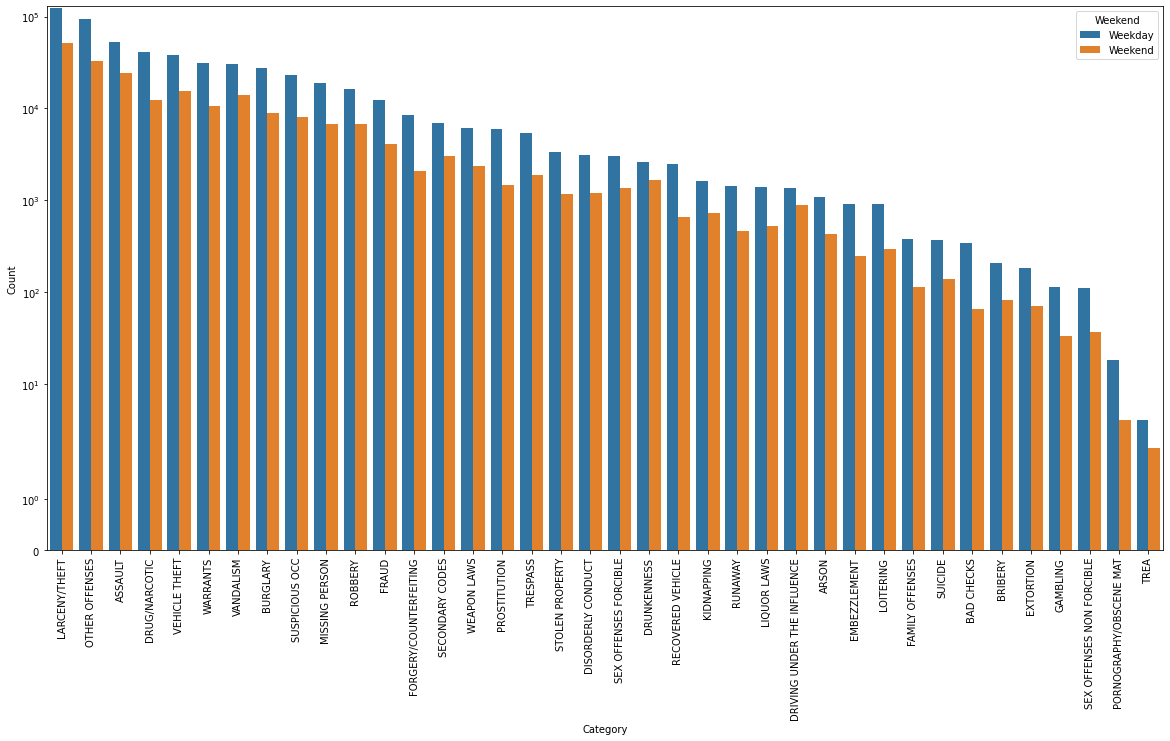

In [65]:
plt.figure(figsize=(20,10))
sns.barplot(x=crime_weekend['Category'], y=crime_weekend['Descript'], hue=crime_weekend['Weekend'])
plt.xticks(rotation=90)
plt.yscale('symlog')
plt.ylabel('Count')
plt.show()

### 요일 별 범죄 건수

In [66]:
crime_per_day = train_dateframe

In [67]:
tmp = pd.concat([crime_per_day, pd.get_dummies(crime_per_day['Category'])], axis=1).drop('Category', axis=1).groupby('DayOfWeek').sum()

In [68]:
tmp.reset_index(inplace=True)

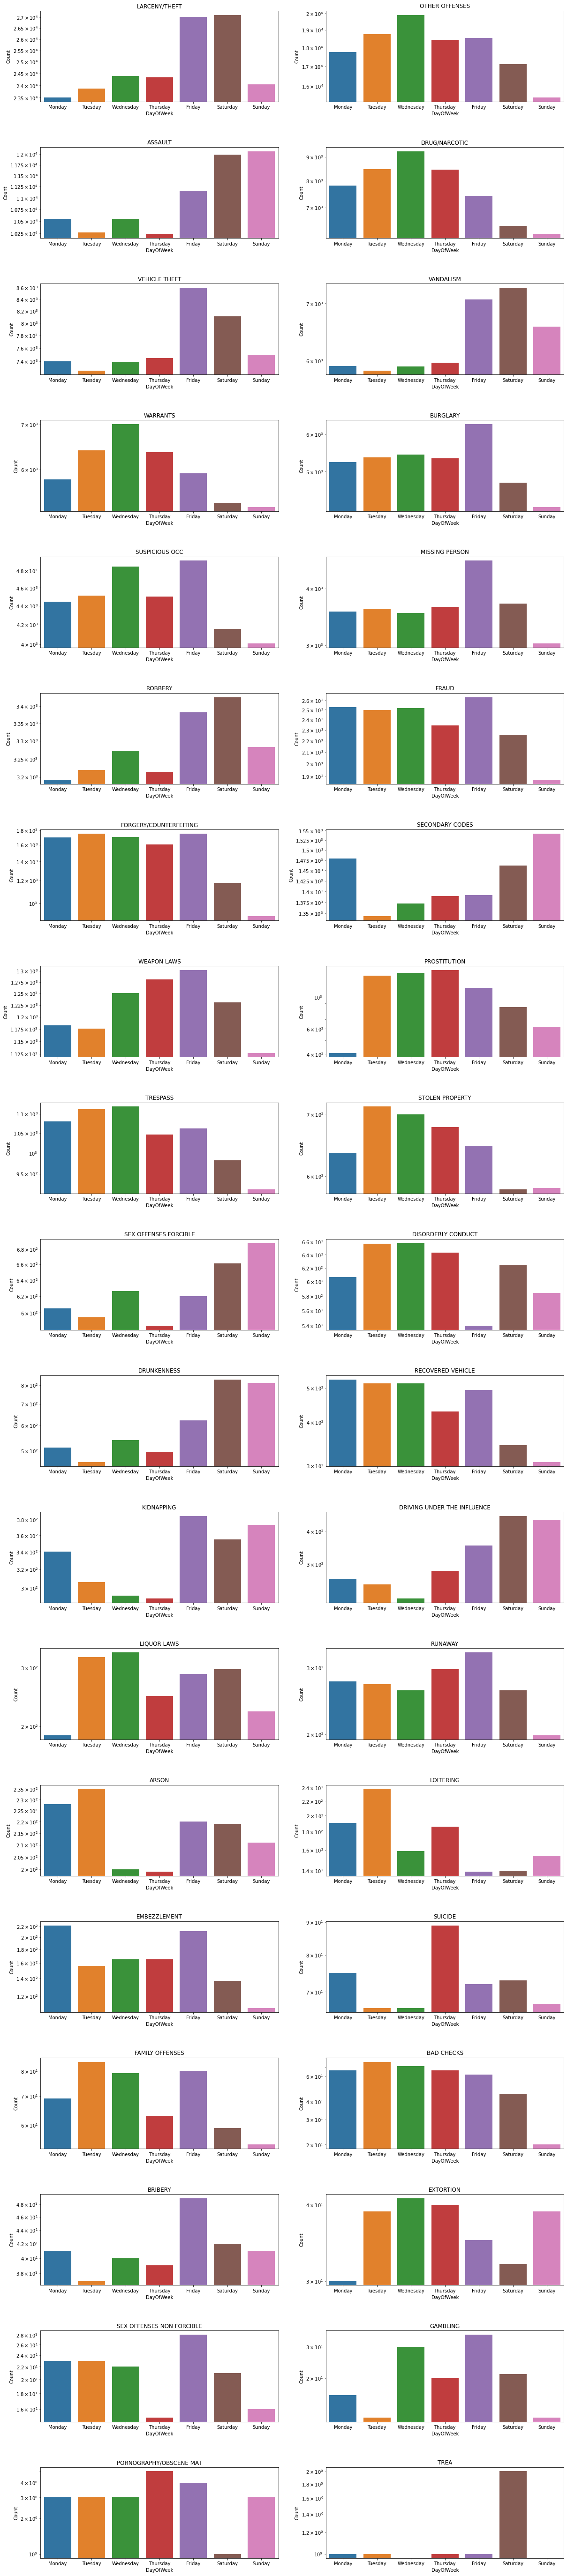

In [69]:
fig, axs = plt.subplots(nrows= len(list(crime_per_day['Category'].value_counts().index)) // 2, ncols=2, figsize=(20, 100))
plt.subplots_adjust(hspace=0.5)

for idx, i in enumerate(list(crime_per_day['Category'].value_counts().index)):
    sns.barplot(x=tmp['DayOfWeek'], y=tmp[i], ax=axs[idx // 2][idx % 2], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    axs[idx // 2][idx % 2].set_title(i)
    axs[idx // 2][idx % 2].set_ylabel('Count')
    axs[idx // 2][idx % 2].set_yscale('log')
    

### 낮, 밤 시간에 따른 범죄 유형 별 범죄 발생 건수

In [70]:
train_dates['Day'].value_counts()

Day      417534
Night    342159
Name: Day, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='count'>

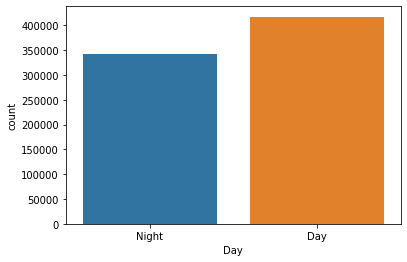

In [71]:
sns.countplot(x='Day', data=train_dates)

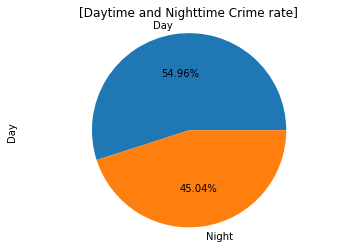

In [72]:
df1 = train_dates['Day'].value_counts()
df1.plot.pie(autopct='%.2f%%')
plt.title("[Daytime and Nighttime Crime rate]")
plt.axis('equal')
plt.show()

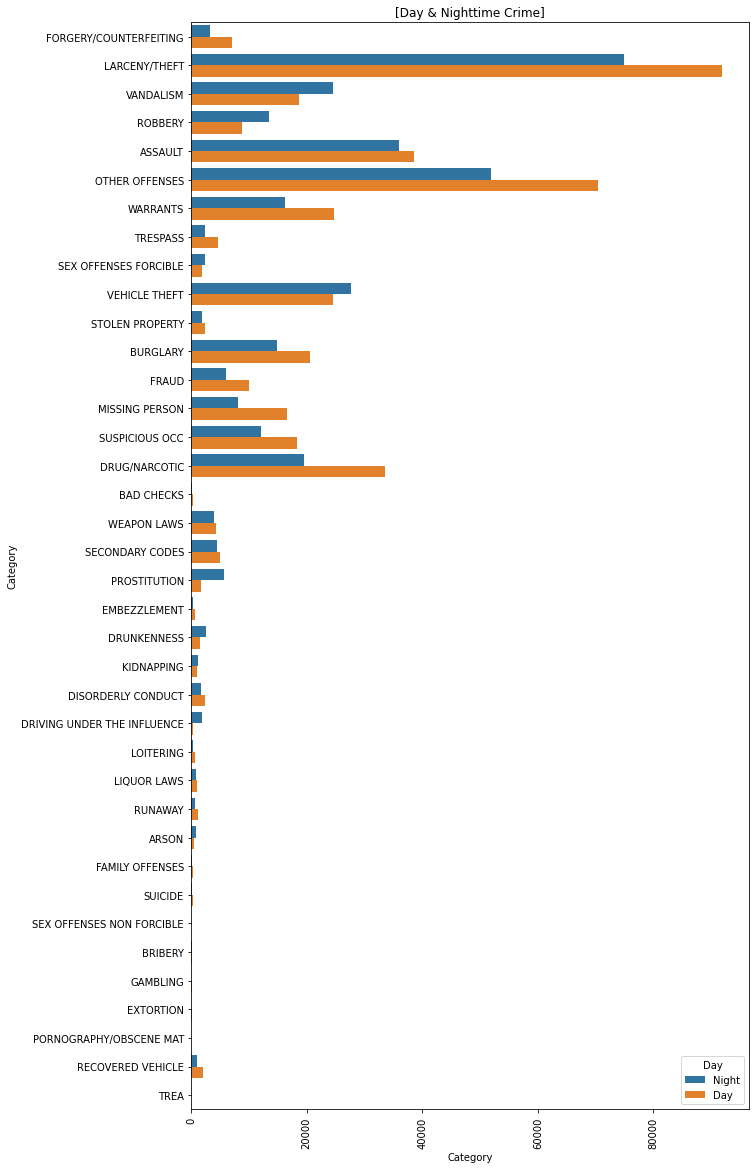

In [73]:
plt.figure(figsize=(10, 20))

sns.countplot(data=train_dates,
            y = 'Category',
            hue = 'Day')

plt.title("[Day & Nighttime Crime]")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.show()

## District에 따른 절도 건수를 시각화

In [74]:
import folium

In [75]:
train_dateframe[(train_dateframe['Year'] == 2003) & (train_dateframe['Category'] == 'LARCENY/THEFT')]

Dates       Category                               Descript  \
875722  2003-01-06  LARCENY/THEFT           GRAND THEFT FROM LOCKED AUTO   
875723  2003-01-06  LARCENY/THEFT           GRAND THEFT FROM LOCKED AUTO   
875713  2003-01-06  LARCENY/THEFT                PETTY THEFT SHOPLIFTING   
875700  2003-01-06  LARCENY/THEFT                 GRAND THEFT PICKPOCKET   
875679  2003-01-06  LARCENY/THEFT           PETTY THEFT FROM LOCKED AUTO   
...            ...            ...                                    ...   
802016  2003-12-28  LARCENY/THEFT  ATTEMPTED THEFT FROM UNLOCKED VEHICLE   
802015  2003-12-28  LARCENY/THEFT           GRAND THEFT FROM LOCKED AUTO   
802007  2003-12-28  LARCENY/THEFT           PETTY THEFT FROM LOCKED AUTO   
802008  2003-12-28  LARCENY/THEFT           PETTY THEFT FROM LOCKED AUTO   
802010  2003-12-28  LARCENY/THEFT            PETTY THEFT FROM A BUILDING   

       DayOfWeek  PdDistrict Resolution                   Address           X  \
875722    Monday   INGLESIDE       NONE      600 Block of EDNA ST -122.447364   
875723    Monday    SOUTHERN       NONE        5TH ST / FOLSOM ST -122.403390   
875713    Monday    NORTHERN       NONE  1300 Block of WEBSTER ST -122.431046   
875700    Monday  TENDERLOIN       NONE     600 Block of ELLIS ST -122.416894   
875679    Monday    SOUTHERN       NONE      5TH ST / HARRISON ST -122.401846   
...          ...         ...        ...                       ...         ...   
802016    Sunday    NORTHERN       NONE     EDDY ST / FILLMORE ST -122.432330   
802015    Sunday    SOUTHERN       NONE       MISSION ST / 7TH ST -122.410939   
802007    Sunday     CENTRAL       NONE   CALIFORNIA ST / HYDE ST -122.417393   
802008    Sunday    SOUTHERN       NONE         0 Block of 5TH ST -122.407805   
802010    Sunday    RICHMOND       NONE      0 Block of LOYOLA TR -122.448997   

                Y  Year  Month  Day  Hour  Minute  Second  
875722  37.731948  2003      1    6     0       1       0  
875723  37.780266  2003      1    6     0       1       0  
875713  37.783030  2003      1    6     0      55       0  
875700  37.784286  2003      1    6     2      15       0  
875679  37.779032  2003      1    6     6       0       0  
...           ...   ...    ...  ...   ...     ...     ...  
802016  37.781429  2003     12   28    21      30       0  
802015  37.779212  2003     12   28    21      30       0  
802007  37.790974  2003     12   28    22       0       0  
802008  37.783707  2003     12   28    22       0       0  
802010  37.775876  2003     12   28    22       0       0  

[12965 rows x 15 columns]

In [76]:
tmp = train_dateframe.copy()

In [77]:
tmp['THEFT'] = tmp['Category'].apply(lambda x : 1 if x == 'LARCENY/THEFT' else 0)

In [78]:
tmp = tmp[tmp['Category'] == 'LARCENY/THEFT'].groupby(['PdDistrict']).sum()

In [79]:
tmp

X             Y      Year   Month     Day    Hour  \
PdDistrict                                                                 
BAYVIEW    -1.233133e+06  3.803228e+05  20241238   64385  159159  141638   
CENTRAL    -3.056922e+06  9.439957e+05  50177120  164086  395934  355886   
INGLESIDE  -1.249649e+06  3.851614e+05  20507631   66554  160689  143596   
MISSION    -2.228181e+06  6.872799e+05  36567455  118471  287138  260663   
NORTHERN   -3.497258e+06  1.079531e+06  57388842  186784  454765  418569   
PARK       -1.116452e+06  3.443949e+05  18320226   58642  144457  131812   
RICHMOND   -1.205705e+06  3.720488e+05  19781972   62927  154330  142126   
SOUTHERN   -5.099339e+06  1.574139e+06  83708788  272564  664026  607871   
TARAVAL    -1.446097e+06  4.456173e+05  23720304   76579  183901  168440   
TENDERLOIN -1.207944e+06  3.729624e+05  19824409   64501  157487  142056   

            Minute  Second  THEFT  
PdDistrict                         
BAYVIEW     145599       0  10075  
CENTRAL     408058       0  24973  
INGLESIDE   146860       0  10207  
MISSION     290971       0  18201  
NORTHERN    453815       0  28566  
PARK        131398       0   9118  
RICHMOND    141540       0   9845  
SOUTHERN    721051       0  41660  
TARAVAL     178265       0  11807  
TENDERLOIN  193549       0   9868

In [80]:
tmp.reset_index(inplace=True)

In [81]:
import pandas as pd
import urllib.request
import folium

#Download San FranciscoCrime DataSet

sf_crime = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
sf_crime.drop(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)
by_zone = sf_crime.apply(pd.Series.value_counts).reset_index()
by_zone.rename(columns={'index':'Neighborhood', 'PdDistrict':'Count'}, inplace=True)

# Download San Francisco district polygon GeoJSON

url = 'https://cocl.us/sanfran_geojson'
urllib.request.urlretrieve(url, 'sf_neighborhoods.json')
sf_zones = r'sf_neighborhoods.json'

# Define San Francisco Center point
sf_lat = 37.77
sf_lon = -122.42

#Create Folium Map
sf_crime_map = folium.Map(location=[sf_lat, sf_lon], 
                         zoom_start=12)

#Create choropleth map with neighborhood polygon colored with crime metric
sf_crime_map.choropleth(
    geo_data=sf_zones,
    data=tmp[['PdDistrict', 'THEFT']],
    columns=['PdDistrict', 'THEFT'],
    key_on='feature.properties.DISTRICT',
    fill_color='Oranges',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Fransisco THEFT Crime'
)

#Plot map
sf_crime_map

/opt/conda/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [82]:
tmp[['PdDistrict', 'THEFT']].sort_values(by='THEFT', ascending=False)

PdDistrict  THEFT
7    SOUTHERN  41660
4    NORTHERN  28566
1     CENTRAL  24973
3     MISSION  18201
8     TARAVAL  11807
2   INGLESIDE  10207
0     BAYVIEW  10075
9  TENDERLOIN   9868
6    RICHMOND   9845
5        PARK   9118

### 이곳에서 절도 범죄가 많이 일어나는 이유는 무엇일까?

#### 가능성 1. 소득수준에 비례

#### 2013년

In [83]:
income = pd.read_csv('./Income by Location.csv')

In [84]:
income.columns

Index(['ID Year', 'Year', 'ID Race', 'Race', 'Household Income by Race',
       'Household Income by Race Moe', 'Geography', 'ID Geography'],
      dtype='object')

In [85]:
income = income[(income['Year'] <=2014)]

In [86]:
income

ID Year  Year  ID Race   Race  Household Income by Race  \
1123     2014  2014        0  Total                     75725   
1124     2014  2014        0  Total                    108976   
1125     2014  2014        0  Total                     89646   
1126     2014  2014        0  Total                    101463   
1127     2014  2014        0  Total                    111531   
...       ...   ...      ...    ...                       ...   
1508     2013  2013        0  Total                     78625   
1509     2013  2013        0  Total                    122596   
1510     2013  2013        0  Total                     13537   
1511     2013  2013        0  Total                     77500   
1512     2013  2013        0  Total                    158015   

      Household Income by Race Moe  \
1123                       11999.0   
1124                       10374.0   
1125                       24689.0   
1126                       13702.0   
1127                       17167.0   
...                            ...   
1508                       34987.0   
1509                       57192.0   
1510                        3863.0   
1511                       61647.0   
1512                       68100.0   

                                           Geography        ID Geography  
1123      Census Tract 101, San Francisco County, CA  14000US06075010100  
1124      Census Tract 102, San Francisco County, CA  14000US06075010200  
1125      Census Tract 103, San Francisco County, CA  14000US06075010300  
1126      Census Tract 104, San Francisco County, CA  14000US06075010400  
1127      Census Tract 105, San Francisco County, CA  14000US06075010500  
...                                              ...                 ...  
1508     Census Tract 9802, San Francisco County, CA  14000US06075980200  
1509     Census Tract 9803, San Francisco County, CA  14000US06075980300  
1510  Census Tract 9805.01, San Francisco County, CA  14000US06075980501  
1511     Census Tract 9806, San Francisco County, CA  14000US06075980600  
1512     Census Tract 9809, San Francisco County, CA  14000US06075980900  

[390 rows x 8 columns]

In [87]:
income.drop('ID Year', axis=1, inplace=True)

In [88]:
income_2013 = income[income['Year'] == 2013]

In [89]:
income_2013

Year  ID Race   Race  Household Income by Race  \
1318  2013        0  Total                     54798   
1319  2013        0  Total                    108557   
1320  2013        0  Total                     91458   
1321  2013        0  Total                     86847   
1322  2013        0  Total                    115233   
...    ...      ...    ...                       ...   
1508  2013        0  Total                     78625   
1509  2013        0  Total                    122596   
1510  2013        0  Total                     13537   
1511  2013        0  Total                     77500   
1512  2013        0  Total                    158015   

      Household Income by Race Moe  \
1318                       24445.0   
1319                       10012.0   
1320                       14530.0   
1321                       27194.0   
1322                       11566.0   
...                            ...   
1508                       34987.0   
1509                       57192.0   
1510                        3863.0   
1511                       61647.0   
1512                       68100.0   

                                           Geography        ID Geography  
1318      Census Tract 101, San Francisco County, CA  14000US06075010100  
1319      Census Tract 102, San Francisco County, CA  14000US06075010200  
1320      Census Tract 103, San Francisco County, CA  14000US06075010300  
1321      Census Tract 104, San Francisco County, CA  14000US06075010400  
1322      Census Tract 105, San Francisco County, CA  14000US06075010500  
...                                              ...                 ...  
1508     Census Tract 9802, San Francisco County, CA  14000US06075980200  
1509     Census Tract 9803, San Francisco County, CA  14000US06075980300  
1510  Census Tract 9805.01, San Francisco County, CA  14000US06075980501  
1511     Census Tract 9806, San Francisco County, CA  14000US06075980600  
1512     Census Tract 9809, San Francisco County, CA  14000US06075980900  

[195 rows x 7 columns]

In [90]:
import json

In [91]:
with open('./2010_sf_census_tracts.geojson', 'r') as file:
    data = json.load(file)

In [92]:
data

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'STATEFP10': '06',
    'COUNTYFP10': '075',
    'TRACTCE10': '016500',
    'GEOID10': '06075016500',
    'NAME10': '165',
    'NAMELSAD10': 'Census Tract 165',
    'MTFCC10': 'G5020',
    'FUNCSTAT10': 'S',
    'ALAND10': 370459.0,
    'AWATER10': 0.0,
    'INTPTLAT10': '+37.7741958',
    'INTPTLON10': '-122.4477884'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-122.446471, 37.775802],
      [-122.44478, 37.776017],
      [-122.443132, 37.776226],
      [-122.441488, 37.776435],
      [-122.4413, 37.775505],
      [-122.44111, 37.774567],
      [-122.440922, 37.773635],
      [-122.442565, 37.773424],
      [-122.444216, 37.773212],
      [-122.445902, 37.772995],
      [-122.447497, 37.77279],
      [-122.449143, 37.772579],
      [-122.450787, 37.772368],
      [-122.452242, 37.772181],
      [-122.452437,

In [93]:
data.keys()

dict_keys(['type', 'crs', 'features'])

In [94]:
for idx,i in enumerate(data['features']):
    if i['properties']['NAMELSAD10'] == 'Census Tract 9901':
        del data['features'][idx]

In [95]:
for i in data['features']:
    if i['properties']['NAMELSAD10'] == 'Census Tract 9901':
        print(i)

In [96]:
income_2013['Geography'] = income_2013['Geography'].apply(lambda x : x.split(',')[0])

/tmp/ipykernel_236/1725265854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_2013['Geography'] = income_2013['Geography'].apply(lambda x : x.split(',')[0])


In [97]:
income_2013

Year  ID Race   Race  Household Income by Race  \
1318  2013        0  Total                     54798   
1319  2013        0  Total                    108557   
1320  2013        0  Total                     91458   
1321  2013        0  Total                     86847   
1322  2013        0  Total                    115233   
...    ...      ...    ...                       ...   
1508  2013        0  Total                     78625   
1509  2013        0  Total                    122596   
1510  2013        0  Total                     13537   
1511  2013        0  Total                     77500   
1512  2013        0  Total                    158015   

      Household Income by Race Moe             Geography        ID Geography  
1318                       24445.0      Census Tract 101  14000US06075010100  
1319                       10012.0      Census Tract 102  14000US06075010200  
1320                       14530.0      Census Tract 103  14000US06075010300  
1321                       27194.0      Census Tract 104  14000US06075010400  
1322                       11566.0      Census Tract 105  14000US06075010500  
...                            ...                   ...                 ...  
1508                       34987.0     Census Tract 9802  14000US06075980200  
1509                       57192.0     Census Tract 9803  14000US06075980300  
1510                        3863.0  Census Tract 9805.01  14000US06075980501  
1511                       61647.0     Census Tract 9806  14000US06075980600  
1512                       68100.0     Census Tract 9809  14000US06075980900  

[195 rows x 7 columns]

In [98]:
tmp = list(income_2013.columns)

In [99]:
tmp[5] = 'NAMELSAD10'

In [100]:
tmp

['Year',
 'ID Race',
 'Race',
 'Household Income by Race',
 'Household Income by Race Moe',
 'NAMELSAD10',
 'ID Geography']

In [101]:
income_2013.columns = tmp

In [102]:
income_2013

Year  ID Race   Race  Household Income by Race  \
1318  2013        0  Total                     54798   
1319  2013        0  Total                    108557   
1320  2013        0  Total                     91458   
1321  2013        0  Total                     86847   
1322  2013        0  Total                    115233   
...    ...      ...    ...                       ...   
1508  2013        0  Total                     78625   
1509  2013        0  Total                    122596   
1510  2013        0  Total                     13537   
1511  2013        0  Total                     77500   
1512  2013        0  Total                    158015   

      Household Income by Race Moe            NAMELSAD10        ID Geography  
1318                       24445.0      Census Tract 101  14000US06075010100  
1319                       10012.0      Census Tract 102  14000US06075010200  
1320                       14530.0      Census Tract 103  14000US06075010300  
1321                       27194.0      Census Tract 104  14000US06075010400  
1322                       11566.0      Census Tract 105  14000US06075010500  
...                            ...                   ...                 ...  
1508                       34987.0     Census Tract 9802  14000US06075980200  
1509                       57192.0     Census Tract 9803  14000US06075980300  
1510                        3863.0  Census Tract 9805.01  14000US06075980501  
1511                       61647.0     Census Tract 9806  14000US06075980600  
1512                       68100.0     Census Tract 9809  14000US06075980900  

[195 rows x 7 columns]

In [103]:
import pandas as pd
import folium

# Define San Francisco Center point
sf_lat = 37.77
sf_lon = -122.42

#Create Folium Map
sf_crime_map = folium.Map(location=[sf_lat, sf_lon], 
                         zoom_start=12)

#Create choropleth map with neighborhood polygon colored with crime metric
a = folium.Choropleth(
    geo_data=data,
    data=income_2013[['NAMELSAD10','Household Income by Race']],
    columns=['NAMELSAD10','Household Income by Race'],
    key_on='feature.properties.NAMELSAD10',
    fill_color='Oranges',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='2013 Household Income',
).add_to(sf_crime_map)

folium.LayerControl().add_to(sf_crime_map)
a.geojson.add_child(folium.features.GeoJsonTooltip(['NAMELSAD10']))

#Plot map
sf_crime_map

In [104]:
tmp = train_dateframe.copy()

In [105]:
tmp['THEFT'] = tmp['Category'].apply(lambda x : 1 if x == 'LARCENY/THEFT' else 0)

In [106]:
tmp = tmp[(tmp['Category'] == 'LARCENY/THEFT') & (tmp['Year'] == 2013)].groupby(['PdDistrict']).sum()

In [107]:
tmp

X              Y     Year  Month    Day   Hour  \
PdDistrict                                                               
BAYVIEW    -134512.342602   41482.250861  2212287   7407  16846  15536   
CENTRAL    -296474.858004   91542.763575  4875486  16529  38496  34394   
INGLESIDE  -134182.701029   41353.035823  2206248   7065  16952  15260   
MISSION    -261981.439129   80808.885140  4307820  14020  33688  30723   
NORTHERN   -340591.994640  105121.527484  5600166  18556  44542  39940   
PARK       -122566.436900   37809.561313  2015013   6521  16374  14296   
RICHMOND   -136188.223731   42011.150509  2238456   7599  17382  16061   
SOUTHERN   -536129.385889  165477.002818  8816940  29743  71020  63640   
TARAVAL    -138400.043546   42642.905309  2274690   7285  17659  16306   
TENDERLOIN -112005.985852   34572.736161  1841895   6067  15291  13054   

            Minute  Second  THEFT  
PdDistrict                         
BAYVIEW      18589       0   1099  
CENTRAL      39686       0   2422  
INGLESIDE    16770       0   1096  
MISSION      36660       0   2140  
NORTHERN     46968       0   2782  
PARK         15832       0   1001  
RICHMOND     16811       0   1112  
SOUTHERN     81003       0   4380  
TARAVAL      18497       0   1130  
TENDERLOIN   18716       0    915

In [108]:
tmp.reset_index(inplace=True)

In [109]:
import pandas as pd
import urllib.request
import folium

#Download San FranciscoCrime DataSet

sf_crime = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
sf_crime.drop(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)
by_zone = sf_crime.apply(pd.Series.value_counts).reset_index()
by_zone.rename(columns={'index':'Neighborhood', 'PdDistrict':'Count'}, inplace=True)

# Download San Francisco district polygon GeoJSON

url = 'https://cocl.us/sanfran_geojson'
urllib.request.urlretrieve(url, 'sf_neighborhoods.json')
sf_zones = r'sf_neighborhoods.json'

# Define San Francisco Center point
sf_lat = 37.77
sf_lon = -122.42

#Create Folium Map
sf_crime_map = folium.Map(location=[sf_lat, sf_lon], 
                         zoom_start=12)

#Create choropleth map with neighborhood polygon colored with crime metric
sf_crime_map.choropleth(
    geo_data=sf_zones,
    data=tmp[['PdDistrict', 'THEFT']],
    columns=['PdDistrict', 'THEFT'],
    key_on='feature.properties.DISTRICT',
    fill_color='Oranges',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Fransisco THEFT Crime'
)

#Plot map
sf_crime_map

/opt/conda/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### 2014년도

In [110]:
income_2014 = income[income['Year'] == 2014]

In [111]:
income_2014['Geography'] = income_2014['Geography'].apply(lambda x : x.split(',')[0])

/tmp/ipykernel_236/3857041134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_2014['Geography'] = income_2014['Geography'].apply(lambda x : x.split(',')[0])


In [112]:
tmp = list(income_2014.columns)

In [113]:
tmp[5] = 'NAMELSAD10'

In [114]:
income_2014.columns = tmp

In [115]:
import pandas as pd
import folium

# Define San Francisco Center point
sf_lat = 37.77
sf_lon = -122.42

#Create Folium Map
sf_crime_map = folium.Map(location=[sf_lat, sf_lon], 
                         zoom_start=12)

#Create choropleth map with neighborhood polygon colored with crime metric
a = folium.Choropleth(
    geo_data=data,
    data=income_2014[['NAMELSAD10','Household Income by Race']],
    columns=['NAMELSAD10','Household Income by Race'],
    key_on='feature.properties.NAMELSAD10',
    fill_color='Oranges',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='2014 Household Income',
).add_to(sf_crime_map)

folium.LayerControl().add_to(sf_crime_map)
a.geojson.add_child(folium.features.GeoJsonTooltip(['NAMELSAD10']))

#Plot map
sf_crime_map

In [116]:
tmp = train_dateframe.copy()

In [117]:
tmp['THEFT'] = tmp['Category'].apply(lambda x : 1 if x == 'LARCENY/THEFT' else 0)

In [118]:
tmp = tmp[(tmp['Category'] == 'LARCENY/THEFT') & (tmp['Year'] == 2014)].groupby(['PdDistrict']).sum()

In [119]:
tmp

X              Y     Year  Month    Day   Hour  \
PdDistrict                                                               
BAYVIEW    -118845.382662   36650.019105  1955594   6043  15544  14203   
CENTRAL    -357067.660262  110252.428200  5874838  20659  46563  42331   
INGLESIDE  -123408.369559   38033.191823  2030112   6880  15947  14372   
MISSION    -198200.118880   61135.573916  3260666   9993  25181  23534   
NORTHERN   -376954.915449  116346.177670  6201106  22163  50295  45389   
PARK       -132485.286798   40869.281464  2179148   7269  16665  16038   
RICHMOND   -135211.116964   41706.964198  2223456   7676  17440  16270   
SOUTHERN   -603205.539022  186179.723420  9924992  34407  78489  73404   
TARAVAL    -140483.999674   43287.134182  2310058   7748  18839  16285   
TENDERLOIN -118493.648766   36575.376053  1949552   6642  15776  13546   

            Minute  Second  THEFT  
PdDistrict                         
BAYVIEW      14813       0    971  
CENTRAL      49740       0   2917  
INGLESIDE    14420       0   1008  
MISSION      27540       0   1619  
NORTHERN     53044       0   3079  
PARK         16667       0   1082  
RICHMOND     16704       0   1104  
SOUTHERN     88574       0   4928  
TARAVAL      17710       0   1147  
TENDERLOIN   18430       0    968

In [120]:
tmp.reset_index(inplace=True)

In [121]:
import pandas as pd
import urllib.request
import folium

#Download San FranciscoCrime DataSet

sf_crime = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
sf_crime.drop(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)
by_zone = sf_crime.apply(pd.Series.value_counts).reset_index()
by_zone.rename(columns={'index':'Neighborhood', 'PdDistrict':'Count'}, inplace=True)

# Download San Francisco district polygon GeoJSON

url = 'https://cocl.us/sanfran_geojson'
urllib.request.urlretrieve(url, 'sf_neighborhoods.json')
sf_zones = r'sf_neighborhoods.json'

# Define San Francisco Center point
sf_lat = 37.77
sf_lon = -122.42

#Create Folium Map
sf_crime_map = folium.Map(location=[sf_lat, sf_lon], 
                         zoom_start=12)

#Create choropleth map with neighborhood polygon colored with crime metric
sf_crime_map.choropleth(
    geo_data=sf_zones,
    data=tmp[['PdDistrict', 'THEFT']],
    columns=['PdDistrict', 'THEFT'],
    key_on='feature.properties.DISTRICT',
    fill_color='Oranges',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Fransisco THEFT Crime'
)

#Plot map
sf_crime_map

/opt/conda/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### 가능성 2. 관광명소

In [122]:
attr_ = {'Golden Gate Bridge' : [37.819927, -122.478256], 
         'Ferry Building Market' : [37.795488, -122.393600],
         'Lombard Street' : [37.801081, -122.426802],
         'Coit tower' : [37.802395, -122.405822],
         'Pier 39' : [37.809326, -122.409981],
         'Ghirardelli Square' : [37.805876, -122.422950],
         'Alamo Square' : [37.777499, -122.433252],
         'Powell And Market Cable Car Turnaround' : [37.784720, -122.407668],
         'Union Square' : [37.787980, -122.407517],
         'China Town' : [37.790163506, -122.404331716]
        }

In [123]:
tmp

PdDistrict              X              Y     Year  Month    Day   Hour  \
0     BAYVIEW -118845.382662   36650.019105  1955594   6043  15544  14203   
1     CENTRAL -357067.660262  110252.428200  5874838  20659  46563  42331   
2   INGLESIDE -123408.369559   38033.191823  2030112   6880  15947  14372   
3     MISSION -198200.118880   61135.573916  3260666   9993  25181  23534   
4    NORTHERN -376954.915449  116346.177670  6201106  22163  50295  45389   
5        PARK -132485.286798   40869.281464  2179148   7269  16665  16038   
6    RICHMOND -135211.116964   41706.964198  2223456   7676  17440  16270   
7    SOUTHERN -603205.539022  186179.723420  9924992  34407  78489  73404   
8     TARAVAL -140483.999674   43287.134182  2310058   7748  18839  16285   
9  TENDERLOIN -118493.648766   36575.376053  1949552   6642  15776  13546   

   Minute  Second  THEFT  
0   14813       0    971  
1   49740       0   2917  
2   14420       0   1008  
3   27540       0   1619  
4   53044       0   3079  
5   16667       0   1082  
6   16704       0   1104  
7   88574       0   4928  
8   17710       0   1147  
9   18430       0    968

In [149]:
import pandas as pd
import urllib.request
import folium

#Download San FranciscoCrime DataSet

sf_crime = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
sf_crime.drop(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)
by_zone = sf_crime.apply(pd.Series.value_counts).reset_index()
by_zone.rename(columns={'index':'Neighborhood', 'PdDistrict':'Count'}, inplace=True)

# Download San Francisco district polygon GeoJSON

url = 'https://cocl.us/sanfran_geojson'
urllib.request.urlretrieve(url, 'sf_neighborhoods.json')
sf_zones = r'sf_neighborhoods.json'

# Define San Francisco Center point
sf_lat = 37.77
sf_lon = -122.42

#Create Folium Map
sf_crime_map = folium.Map(location=[sf_lat, sf_lon], 
                         zoom_start=12)

#Create choropleth map with neighborhood polygon colored with crime metric
a = folium.Choropleth(
    geo_data=sf_zones,
    data=tmp[['PdDistrict', 'THEFT']],
    columns=['PdDistrict', 'THEFT'],
    key_on='feature.properties.DISTRICT',
    fill_color='Oranges',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Fransisco THEFT Crime'
).add_to(sf_crime_map)

folium.LayerControl().add_to(sf_crime_map)
a.geojson.add_child(folium.features.GeoJsonTooltip(['DISTRICT']))

#Plot map
sf_crime_map

In [125]:
tmp[['PdDistrict', 'THEFT']].sort_values(by='THEFT', ascending=False)

PdDistrict  THEFT
7    SOUTHERN   4928
4    NORTHERN   3079
1     CENTRAL   2917
3     MISSION   1619
8     TARAVAL   1147
6    RICHMOND   1104
5        PARK   1082
2   INGLESIDE   1008
0     BAYVIEW    971
9  TENDERLOIN    968

#### 가능성 3. 백화점, 아울렛 등 상업지구

In [126]:
train_places[train_places['Category']=='LARCENY/THEFT']['Address'].value_counts()

800 Block of BRYANT ST                 6089
800 Block of MARKET ST                 3253
100 Block of OFARRELL ST               1093
3200 Block of 20TH AV                  1011
700 Block of MARKET ST                  859
                                       ... 
RAMONA ST / 15TH ST                       1
600 Block of SARGENT ST                   1
SOUTHERNHEIGHTS AV / RHODEISLAND ST       1
700 Block of EUGENIA AV                   1
35TH AV / ANZA ST                         1
Name: Address, Length: 17535, dtype: int64

In [127]:
theft_places = train_places[train_places['Category']=='LARCENY/THEFT']['Address'].value_counts().index.tolist()

In [128]:
a1 = train_places[train_places['Address']==theft_places[0]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[0])
a1

800 Block of BRYANT ST


[(37.775420706711, -122.403404791479),
 (37.7758599616408, -122.402849079555),
 (37.774893379986295, -122.40387577728998),
 (37.7745092578475, -122.404557850736),
 (37.77443141876029, -122.404460192279),
 (37.775766337636, -122.402771389219),
 (37.7753428666813, -122.403307133032),
 (37.77495469614721, -122.403994338135)]

In [129]:
a2 = train_places[train_places['Address']==theft_places[1]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[1])
a2

800 Block of MARKET ST


[(37.7841893501425, -122.407633520742),
 (37.7850629421661, -122.406520987144),
 (37.7852071918419, -122.406690592261),
 (37.784253176872, -122.407902468508)]

In [130]:
a3 = train_places[train_places['Address']==theft_places[2]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[2])
a3

100 Block of OFARRELL ST


[(37.7865647607685, -122.407244087032), (37.7864562588009, -122.407222440955)]

In [131]:
a4 = train_places[train_places['Address']==theft_places[3]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[3])
a4

3200 Block of 20TH AV


[(37.7285280627465, -122.475647460786), (37.72852470686, -122.475509213337)]

In [132]:
a5 = train_places[train_places['Address']==theft_places[4]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[4])
a5

700 Block of MARKET ST


[(37.7859774761625, -122.405359371753),
 (37.7863072236365, -122.405294845215),
 (37.7871160984672, -122.403919148357),
 (37.787256092799296, -122.40409466245),
 (37.7864540511999, -122.404756583284)]

In [133]:
a6 = train_places[train_places['Address']==theft_places[5]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[5])
a6

2000 Block of MARKET ST


[(37.76924706320701, -122.426955631709),
 (37.76831480085021, -122.427682264817),
 (37.7675315414279, -122.428693725184),
 (37.76830755771221, -122.428147544997)]

In [134]:
a7 = train_places[train_places['Address']==theft_places[6]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[6])
a7

0 Block of PHELAN AV


[(37.72569335757029, -122.452289660492),
 (37.725717254655706, -122.452428220398)]

In [135]:
a8 = train_places[train_places['Address']==theft_places[7]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[7])
a8

500 Block of JOHNFKENNEDY DR


[(37.7725405391593, -122.466204667893),
 (37.7726024546299, -122.467349199663),
 (37.772650144606, -122.466213960358)]

In [136]:
a9 = train_places[train_places['Address']==theft_places[8]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[8])
a9

100 Block of POWELL ST


[(37.7859507767613, -122.40801449292), (37.785968007677496, -122.407877787733)]

In [137]:
a10 = train_places[train_places['Address']==theft_places[9]][['Y', 'X']].value_counts().index.tolist()
print(theft_places[9])
a10

0 Block of POWELL ST


[(37.7850943210103, -122.407845374111),
 (37.785103454566105, -122.407707096397)]

In [138]:
loc_list = [['800 Block of BRYANT ST', 'The Police Credit Union'],
            ['800 Block of MARKET ST', 'Union Square'],
            ['100 Block of OFARRELL ST', 'Union Square'],
            ['3200 Block of 20TH AV', 'Stonestown Galleria'],
            ['700 Block of MARKET ST', 'Union Square'],
            ['2000 Block of MARKET ST', 'Top Exotics Cannabis & Psychedelics Shop'],
            ['0 Block of PHELAN AV', 'City College of San Francisco'],
            ['500 Block of JOHNFKENNEDY DR', 'Golden Gate Park'],
            [ '100 Block of POWELL ST', 'Union Square'],
            ['0 Block of POWELL ST', 'Union Square']]

In [139]:
center = folium.Map(location=[37.76147924758818, -122.44687192967375], 
                         zoom_start=12)

for i in range(len(a1)):
    folium.Marker(
        location=[a1[i][0], a1[i][1]],
        tooltip=(1, theft_places[0]),
        popup='The Police Credit Union',
        icon=folium.Icon(color='blue',icon='star')
    ).add_to(center)

for i in range(len(a2)):
    folium.Marker(
        location=[a2[i][0], a2[i][1]],
        tooltip=(2, theft_places[1]),
        popup='Union Square',
        icon=folium.Icon(color='darkred',icon='star')
    ).add_to(center)

In [140]:
def common_theft_places(a, num, color):
    for i in range(len(a)):
        folium.Marker(
            location=[a[i][0], a[i][1]],
            tooltip=theft_places[num-1],
            popup=loc_list[num-1][1],
            icon=folium.Icon(color=color,icon='star')
        ).add_to(center)

In [141]:
common_theft_places(a3, 3, 'red')
common_theft_places(a4, 4, 'gray')
common_theft_places(a5, 5, 'pink')
common_theft_places(a6, 6, 'green')
common_theft_places(a7, 7, 'lightgray')
common_theft_places(a8, 8, 'beige')
common_theft_places(a9, 9, 'darkpurple')
common_theft_places(a10, 10, 'purple')

In [142]:
center

In [143]:
union_square=[[37.78995971523579, -122.41046690109417],
              [37.78332915601269, -122.4089648639679],
              [37.788908361901065, -122.40199112016748],
              [37.79099409665989, -122.40244173130532]]

In [144]:
square = folium.Map(location=[37.788602171215885, -122.42197573763876],
                    zoom_start=14).add_to(center)

folium.Polygon(
    locations = union_square,
    fill = True,
    tooltip = 'Union Square'
).add_to(square)

square